In [2]:
hotel <- read.csv('taipei_hotel.csv.txt', header=TRUE)

In [3]:
hotel

address,lat,lon,title,district
"No.30 Youya Road, Beitou District, Taipei 11243, Taiwan",25.13779,121.5149,Grand View Resort Beitou,Beitou
"No.28 Section 1, Minsheng East Road, Zhongshan District, Taipei 104, Taiwan",25.05785,121.5241,YoMi Hotel,Zhongshan
"No.3 Zhongshan Road, Beitou District, Taipei 11243, Taiwan",25.13716,121.5054,Beitou Hot Spring Resort (Tian Yue Quan),Beitou
"No.18 Songgao Road, Xinyi District, Taipei 11073, Taiwan",25.03925,121.5674,Humble House Taipei,Xinyi
"4F., No.11, Sec. 2, Nanjing E. Road, Taipei 104, Taiwan",25.05206,121.5283,Taipei Morning Hotel,Zhongshan
"No.131 Section 3, Nanjing East Road, Zhongshan District, Taipei 104, Taiwan",25.05203,121.5410,FX Hotel - Taipei Nanjing East Road,Zhongshan
"2F, No.42, Section 1, Minsheng East Road, Taipei 104, Taiwan",25.05815,121.5245,Via Hotel Loft,Zhongshan
"No.38 Songren Road, Xinyi District, Taipei 110, Taiwan",25.03787,121.5680,Le Meridien Taipei,Xinyi
"No.63 Sung Chiang Road, Taipei 104, Taiwan",25.04892,121.5333,Evergreen Laurel Hotel,Zhongshan
"No.600 Linshen North Road, Zhongshan District, Taipei 104, Taiwan",25.06592,121.5257,Imperial Hotel Taipei,Zhongshan


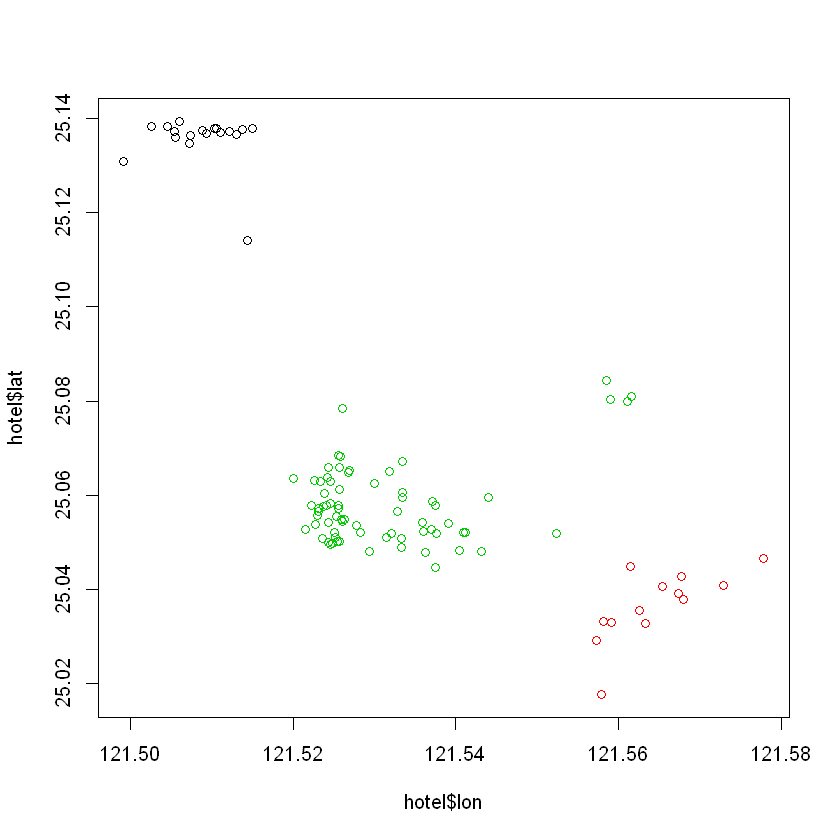

In [4]:
plot(hotel$lon, hotel$lat, col=hotel$district)

In [5]:
hotel.dist <- dist(hotel[,c('lat', 'lon')] , method="euclidean")

In [6]:
hc <- hclust(hotel.dist, method="ward.D2")

In [7]:
hc


Call:
hclust(d = hotel.dist, method = "ward.D2")

Cluster method   : ward.D2 
Distance         : euclidean 
Number of objects: 102 


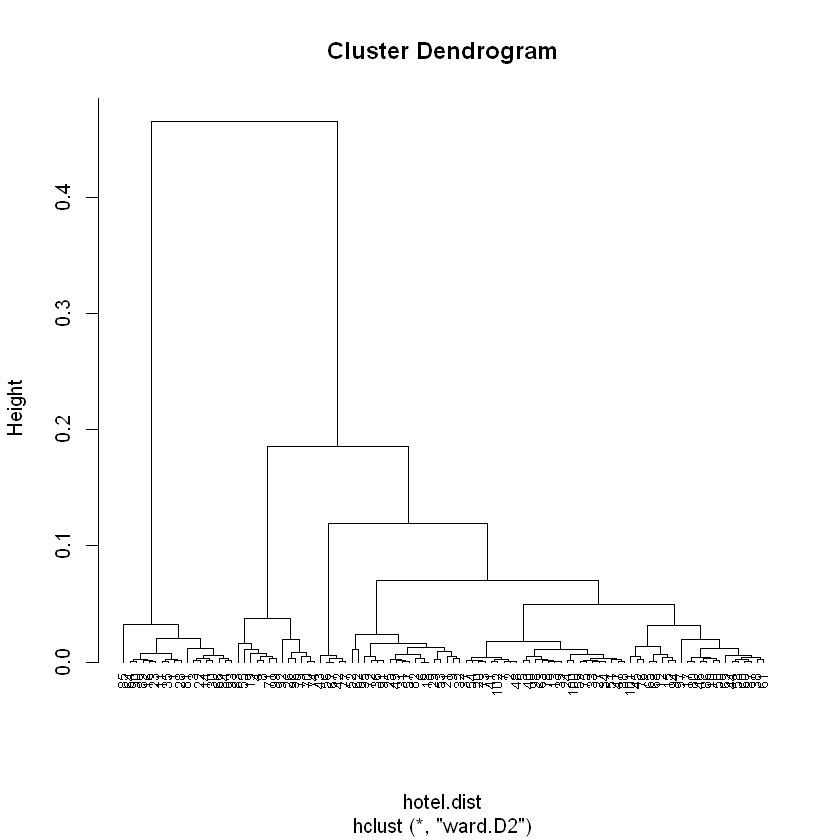

In [8]:
plot(hc, hang = -0.01, cex = 0.7)

In [10]:
library(diana)
#dianan is for hierachial clustering
dv = diana(hotel, metric = "euclidean")

ERROR: Error in library(diana): there is no package called 'diana'


In [13]:
fit <- cutree(hc, k = 3)

In [14]:
fit

[1] 1 2 1 3 2 2 2 3 2 2 1 2 2 1 2 1 2 2 3 2 2 1 1 2 2 3 2 1 2 1 2 2 2 2 1 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 1 2 1 2 2 2 3 3 2 2 3
 [75] 2 2 2 2 3 2 1 2 3 1 1 2 2 2 1 1 2 3 1 2 2 3 2 2 3 2 2 2

In [15]:
 table(fit)

fit
 1  2  3 
18 71 13 

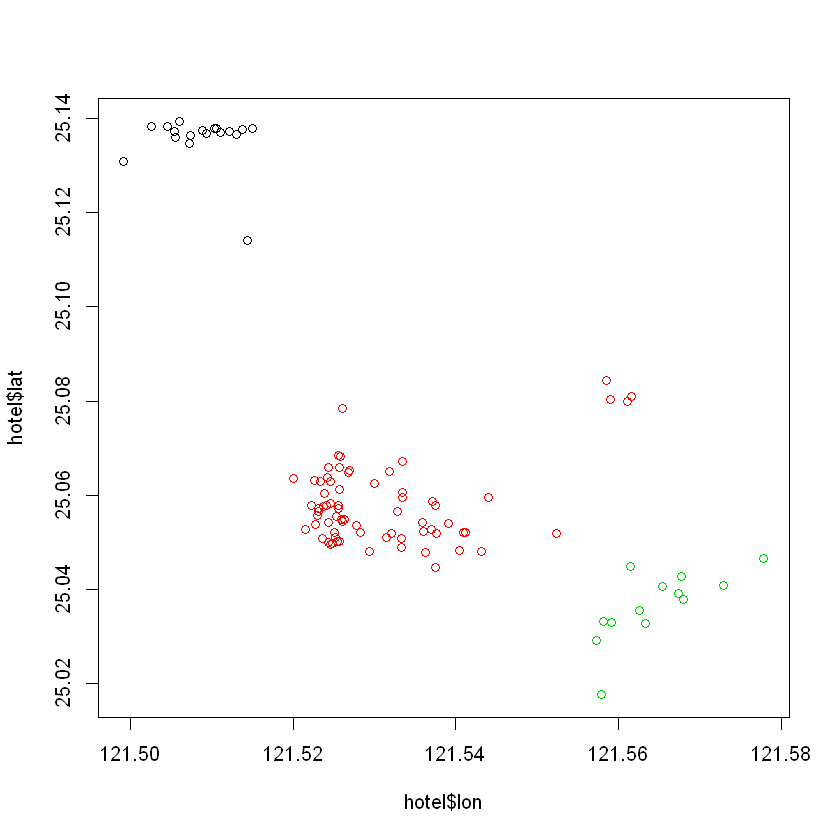

In [16]:
plot(hotel$lon, hotel$lat, col=fit)

In [17]:
kmeans

function (x, centers, iter.max = 10L, nstart = 1L, algorithm = c("Hartigan-Wong", 
    "Lloyd", "Forgy", "MacQueen"), trace = FALSE) 
{
    .Mimax <- .Machine$integer.max
    do_one <- function(nmeth) {
        switch(nmeth, {
            isteps.Qtran <- as.integer(min(.Mimax, 50 * m))
            iTran <- c(isteps.Qtran, integer(max(0, k - 1)))
            Z <- .Fortran(C_kmns, x, m, p, centers = centers, 
                as.integer(k), c1 = integer(m), c2 = integer(m), 
                nc = integer(k), double(k), double(k), ncp = integer(k), 
                D = double(m), iTran = iTran, live = integer(k), 
                iter = iter.max, wss = double(k), ifault = as.integer(trace))
            switch(Z$ifault, stop("empty cluster: try a better set of initial centers", 
                call. = FALSE), Z$iter <- max(Z$iter, iter.max + 
                1L), stop("number of cluster centres must lie between 1 and nrow(x)", 
                call. = FALSE), warning(gettextf("Quick-TRANSfer stage steps exceeded maximum (= %d)", 
                isteps.Qtran), call. = FALSE))
        }, {
            Z <- .C(C_kmeans_Lloyd, x, m, p, centers = centers, 
                k, c1 = integer(m), iter = iter.max, nc = integer(k), 
                wss = double(k))
        }, {
            Z <- .C(C_kmeans_MacQueen, x, m, p, centers = as.double(centers), 
                k, c1 = integer(m), iter = iter.max, nc = integer(k), 
                wss = double(k))
        })
        if (m23 <- any(nmeth == c(2L, 3L))) {
            if (any(Z$nc == 0)) 
                warning("empty cluster: try a better set of initial centers", 
                  call. = FALSE)
        }
        if (Z$iter > iter.max) {
            warning(sprintf(ngettext(iter.max, "did not converge in %d iteration", 
                "did not converge in %d iterations"), iter.max), 
                call. = FALSE, domain = NA)
            if (m23) 
                Z$ifault <- 2L
        }
        if (nmeth %in% c(2L, 3L)) {
            if (any(Z$nc == 0)) 
                warning("empty cluster: try a better set of initial centers", 
                  call. = FALSE)
        }
        Z
    }
    x <- as.matrix(x)
    m <- as.integer(nrow(x))
    if (is.na(m)) 
        stop("invalid nrow(x)")
    p <- as.integer(ncol(x))
    if (is.na(p)) 
        stop("invalid ncol(x)")
    if (missing(centers)) 
        stop("'centers' must be a number or a matrix")
    nmeth <- switch(match.arg(algorithm), `Hartigan-Wong` = 1L, 
        Lloyd = 2L, Forgy = 2L, MacQueen = 3L)
    storage.mode(x) <- "double"
    if (length(centers) == 1L) {
        k <- centers
        if (nstart == 1L) 
            centers <- x[sample.int(m, k), , drop = FALSE]
        if (nstart >= 2L || any(duplicated(centers))) {
            cn <- unique(x)
            mm <- nrow(cn)
            if (mm < k) 
                stop("more cluster centers than distinct data points.")
            centers <- cn[sample.int(mm, k), , drop = FALSE]
        }
    }
    else {
        centers <- as.matrix(centers)
        if (any(duplicated(centers))) 
            stop("initial centers are not distinct")
        cn <- NULL
        k <- nrow(centers)
        if (m < k) 
            stop("more cluster centers than data points")
    }
    k <- as.integer(k)
    if (is.na(k)) 
        stop("'invalid value of 'k'")
    if (k == 1L) 
        nmeth <- 3L
    iter.max <- as.integer(iter.max)
    if (is.na(iter.max) || iter.max < 1L) 
        stop("'iter.max' must be positive")
    if (ncol(x) != ncol(centers)) 
        stop("must have same number of columns in 'x' and 'centers'")
    storage.mode(centers) <- "double"
    Z <- do_one(nmeth)
    best <- sum(Z$wss)
    if (nstart >= 2L && !is.null(cn)) 
        for (i in 2:nstart) {
            centers <- cn[sample.int(mm, k), , drop = FALSE]
            ZZ <- do_one(nmeth)
            if ((z <- sum(ZZ$wss)) < best) {
                Z <- ZZ
                best <- z
            }
        }
    cente

In [18]:
fit <- kmeans(hotel[,c("lon", "lat")], 3)

In [19]:
fit

K-means clustering with 3 clusters of sizes 14, 18, 70

Cluster means:
       lon      lat
1 121.5637 25.03758
2 121.5087 25.13559
3 121.5312 25.05833

Clustering vector:
  [1] 2 3 2 1 3 3 3 1 3 3 2 3 3 2 3 2 3 3 1 3 3 2 2 3 3 1 3 2 3 2 3 3 3 3 2 3 3
 [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 1 3 2 3 2 3 3 3 1 1 3 3 1
 [75] 3 3 3 3 1 3 2 3 1 2 2 3 3 3 2 2 3 1 2 3 3 1 3 3 1 3 3 3

Within cluster sum of squares by cluster:
[1] 0.0015208287 0.0008661602 0.0123262728
 (between_SS / total_SS =  89.5 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [20]:
install.packages('cluster',repos="http://cran.us.r-project.org")

package 'cluster' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ZekeLabs\AppData\Local\Temp\Rtmp4ilSmV\downloaded_packages


In [21]:
library(cluster)

Warning message:
"package 'cluster' was built under R version 3.3.3"

In [22]:
km <- kmeans(hotel[,c('lon', 'lat')], 3)

In [23]:
hotel.dist <- dist(hotel[,c('lat', 'lon')] , method="euclidean")

In [24]:
kms <- silhouette(km$cluster, hotel.dist)

In [25]:
summary(kms)

Silhouette of 102 units in 3 clusters from silhouette.default(x = km$cluster, dist = hotel.dist) :
 Cluster sizes and average silhouette widths:
       14        70        18 
0.6643887 0.6248553 0.9025288 
Individual silhouette widths:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1102  0.6302  0.7143  0.6793  0.7518  0.9385 

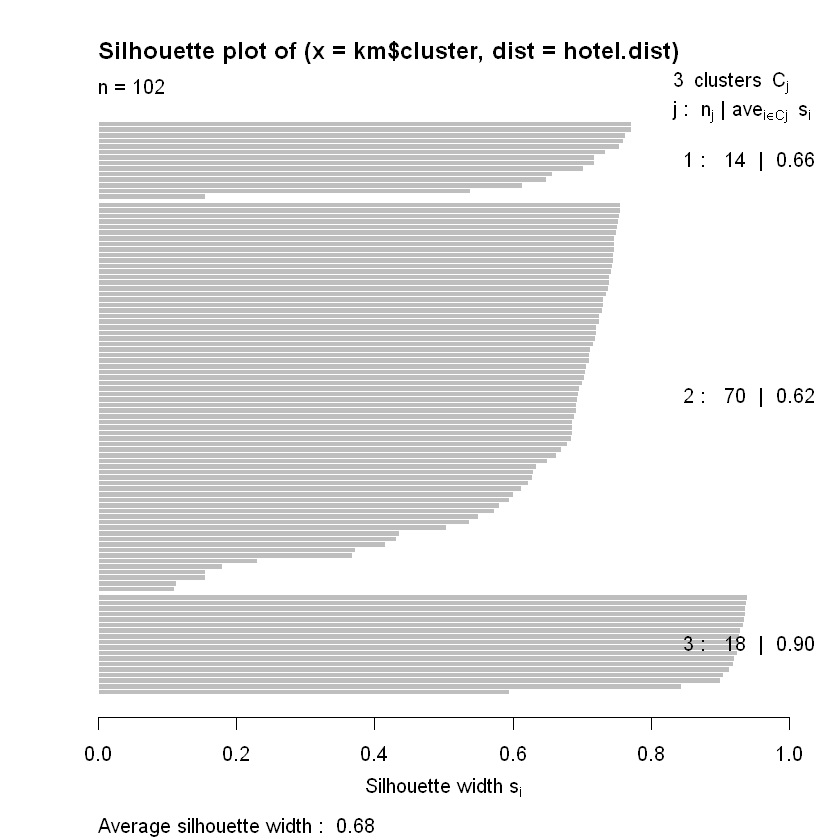

In [26]:
plot(kms)